In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns

from scipy.stats import norm

# Chapter 1: Introduction to Data

## 1.1 Case Study: using stents to prevent strokes

In [2]:
# retrieve datasets
stent30 = pd.read_csv(
    'OI_Resources/stent30.csv',
    header=0,
    names=['group', '0_to_30_days']
)
stent365 = pd.read_csv(
    'OI_Resources/stent365.csv',
    header=0,
    names= ['group', '0_to_365_days']
)

# create stents dataset
stents = pd.concat(
    [stent30, stent365['0_to_365_days']],
    axis='columns'
)

# dataset rows and columns
print(stent30.shape, stent365.shape, stents.shape)
# sample 8 records
display(stents.sample(8))
# patient outcomes for treatment groups
# display(stents[['group', '0_to_30_days']].value_counts())
# display(stents[['group', '0_to_365_days']].value_counts())

(451, 2) (451, 2) (451, 3)


,group,0_to_30_days,0_to_365_days
236,control,stroke,stroke
221,treatment,no event,no event
121,treatment,no event,no event
324,control,no event,no event
442,control,no event,no event
443,control,no event,no event
318,control,no event,no event
152,treatment,no event,no event


In [3]:
# patient outcomes for treatment groups
month_outcomes = pd.crosstab(stents['group'], stents['0_to_30_days'])
year_outcomes = pd.crosstab(stents['group'], stents['0_to_365_days'])
display(month_outcomes)
display(year_outcomes)

0_to_30_days,no event,stroke
group,,
control,214,13
treatment,191,33


0_to_365_days,no event,stroke
group,,
control,199,28
treatment,179,45


**Summary statistic**: A single number summarizing a large amount of data.

In [4]:
# proportion of patients in control group who had stroke within 1 year
year_control_stroke_prop = round((year_outcomes.loc['control', 'stroke']\
/ year_outcomes.loc['control'].sum())*100, 2)
# proportion of patients in treatment group who had stroke within 1 year
year_treatment_stroke_prop = round((year_outcomes.loc['treatment', 'stroke']\
/ year_outcomes.loc['treatment'].sum())*100, 2)

print('Proportion of strokes in 1-year control group:', f'{year_control_stroke_prop}%')
print('Proportion of strokes in 1-year treatment group:', f'{year_treatment_stroke_prop}%')

# difference in proportions (treatment - control)
year_stroke_prop_difference = year_treatment_stroke_prop - year_control_stroke_prop

print('Difference in stroke proportions:',\
    f'{abs(year_stroke_prop_difference)}%',\
    'more strokes in',\
    'treatment' if year_stroke_prop_difference >= 0 else 'control',
    'group'
)

Proportion of strokes in 1-year control group: 12.33%
Proportion of strokes in 1-year treatment group: 20.09%
Difference in stroke proportions: 7.76% more strokes in treatment group


**Do not generalize to all patients and all stents**: This study only considers one type of stent and the patients all had specific characteristics, and all volunteered to be part of the study.

## 1.1 Exercises

### 1.1.1

In [5]:
# data-only dataframe
migraine_df = pd.DataFrame(
    data= [
        [10, 33],
        [2, 44]
    ],
    index= [
        'Treatment',
        'Control'
    ],
    columns= [
        'Pain_free',
        'Not_pain_free'
    ]
)
# add totals row and column
migraine_df['Group_total'] = [sum(migraine_df.loc[idx]) for idx in migraine_df.index]
migraine_df.loc['Outcome_total'] = migraine_df.sum()

display(migraine_df)

# 1.1.1a
pct_treat_pf = migraine_df.loc['Treatment', 'Pain_free'] / migraine_df.loc['Treatment', 'Group_total']
print(f'Percent of pain-free patients in the treatment group: {round(pct_treat_pf*100, 2)}%')
# 1.1.1b
pct_cont_pf = migraine_df.loc['Control', 'Pain_free'] / migraine_df.loc['Control', 'Group_total']
print(f'Percent of pain-free patients in the control group: {round(pct_cont_pf*100, 2)}%')
# 1.1.1c
higher_pct_group = 'Treatment' if pct_treat_pf > pct_cont_pf else 'Control' 
print(f'The {higher_pct_group} group had a higher percentage of pain-free patients.')
# 1.1.1d
pct_difference = abs(pct_treat_pf - pct_cont_pf)
print(
    f'The difference of {round(pct_difference*100, 2)}% could be attributed to random chance,',
     'though this is unlikely.'
)

,Pain_free,Not_pain_free,Group_total
Treatment,10,33,43
Control,2,44,46
Outcome_total,12,77,89


Percent of pain-free patients in the treatment group: 23.26%
Percent of pain-free patients in the control group: 4.35%
The Treatment group had a higher percentage of pain-free patients.
The difference of 18.91% could be attributed to random chance, though this is unlikely.


### 1.1.2

In [6]:
# create full df (with totals)
sinusitis_df = pd.DataFrame(
    data= {
        'Improvement': [66, 65, 131],
        'No_improvement': [19, 16, 35],
        'Group_total': [85, 81, 166]
    },
    index= [
        'Treatment',
        'Control',
        'Outcome_total'
    ]
)

display(sinusitis_df)

#1.1.2a
pct_treat_i = sinusitis_df.loc['Treatment', 'Improvement'] / sinusitis_df.loc['Treatment', 'Group_total']
print(f'Percent of treatment patients with improvement in symptoms: {round(pct_treat_i*100, 2)}%')
#1.1.2b
pct_cont_i = sinusitis_df.loc['Control', 'Improvement'] / sinusitis_df.loc['Control', 'Group_total']
print(f'Percent of control patients with improvement in symptoms: {round(pct_cont_i*100, 2)}%')
#1.1.2c
higher_pct_group = 'Treatment' if pct_treat_i > pct_cont_i else 'Control'
print(f'The {higher_pct_group} group had a higher percentage of patients with improvment in symptoms.')
#1.1.2d
pct_difference = abs(pct_treat_i - pct_cont_i)
print(
    f'With a difference of {round(pct_difference*100, 2)}%,',
    'there does not seem to be a real difference between the two groups.'
)
print('The difference is likely due to random chance.')


,Improvement,No_improvement,Group_total
Treatment,66,19,85
Control,65,16,81
Outcome_total,131,35,166


Percent of treatment patients with improvement in symptoms: 77.65%
Percent of control patients with improvement in symptoms: 80.25%
The Control group had a higher percentage of patients with improvment in symptoms.
With a difference of 2.6%, there does not seem to be a real difference between the two groups.
The difference is likely due to random chance.


## 1.2: Data Basics

A **data matrix** is a representation in tabular format, where each row is a data entity called a **point**, **case**, **record**, or **observation**. Each column is a characteristic, called a **variable** or **feature**.

In [7]:
loan50 = pd.read_csv(
    'OI_Resources/loan50.csv',
    usecols= [
        'loan_amount',
        'interest_rate',
        'term',
        'grade',
        'state',
        'total_income',
        'homeownership'
    ]
)[[
    'loan_amount',
    'interest_rate',
    'term',
    'grade',
    'state',
    'total_income',
    'homeownership'
]]
display(loan50.head())

,loan_amount,interest_rate,term,grade,state,total_income,homeownership
0,22000,10.90,60,B,NJ,59000,rent
1,6000,9.92,36,B,CA,60000,rent
2,25000,26.30,36,E,SC,75000,mortgage
3,6000,9.92,36,B,CA,75000,rent
4,25000,9.43,60,B,OH,254000,mortgage


- loan_amount: loan amount in USD.
- interest_rate: interest rate as annual percentage.
- term: length of loan in whole number months.
- grade: likelihood of being repaid. A through G, with A being most likely, and G being most unlikely.
- state: US state where borrower resides.
- total_income: total annual income in USD.
- homeownership: indicates whether borrower owns home, has a mortgage, or rents.

It is **extremely important** that you **understand what your features represent**. This requires **domain knowledge** of the data's origin industry, but equally important is understanding **what units of measurement each feature uses**. An annual interest rate recorded as a percentage is very different from a monthly interest rate recorded as a float between 0 and 1!

In [8]:
county = pd.read_csv('OI_Resources/county.csv')
display(county.head())

,name,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,per_capita_income,median_hh_income,smoking_ban
0,Autauga County,Alabama,43671.0,54571,55504.0,1.48,13.7,77.5,7.2,3.86,yes,some_college,27841.70,55317.0,none
1,Baldwin County,Alabama,140415.0,182265,212628.0,9.19,11.8,76.7,22.6,3.99,yes,some_college,27779.85,52562.0,none
2,Barbour County,Alabama,29038.0,27457,25270.0,-6.22,27.2,68.0,11.1,5.90,no,hs_diploma,17891.73,33368.0,partial
3,Bibb County,Alabama,20826.0,22915,22668.0,0.73,15.2,82.9,6.6,4.39,yes,hs_diploma,20572.05,43404.0,none
4,Blount County,Alabama,51024.0,57322,58013.0,0.68,15.6,82.0,3.7,4.02,yes,hs_diploma,21367.39,47412.0,none


- name: county name
- state: state where the county resides, or the District of Columbia
- pop: population in 2017
- pop_change: percent change in the population from 2010 to 2017. For example, the value 1.48 in the first row means the population for this county increased by 1.48% from 2010 to 2017
- poverty: percent of the population in poverty
- homeownership: percent of the population that lives in their own home or lives with the owner, e.g. children living with parents who own the home.
- multi_unit: percent of living units that are in multi-unit structures, e.g. apartments
- unemp_rate: unemployment rate as a percent
- metro: whether the county contains a metropolitan area
- median_edu: median education level, which can take a value among below hs, hs diploma, some college, and bachelors.
- median_hh_income: median household income for the county, where a household's income equals
the total income of its occupants who are 15 years or older

The table has a variety of different types of variables.
Data can be broken into two groups, **numerical** and **categorical**, and then into four subgroups. **Numerical** data is either **discrete** or **continuous**, and categorical data is either **ordinal** or **nominal**. The distinct possible values in a **categorical** variable are called **levels**.

- **discrete numerical**: the number of distinct possible data values are finite, or, the number of distinct possible values can be counted. For example, the `pop2000` variable above is a discrete variable because it can only measure whole, non-negative numbers. While the population variable can take many different values (in fact, almost every value is distinct), it is finite and countable, and therefore discrete.
- **continuous numerical**: the number of distinct possible data values are infinite, or cannot be counted. The `unemployment_rate` variable is continuous because it is a float, infinitely divisible into smaller amounts.
- **ordinal categorical**: there is an ordering to the categories. For example, the `median_edu` variable above takes on increasing values of education level, from *below hs* to *bachelors*.
- **nominal categorical**: there is no ordering to the categories. The `state` variable is an example, since it has no meaningful ordering on its own.

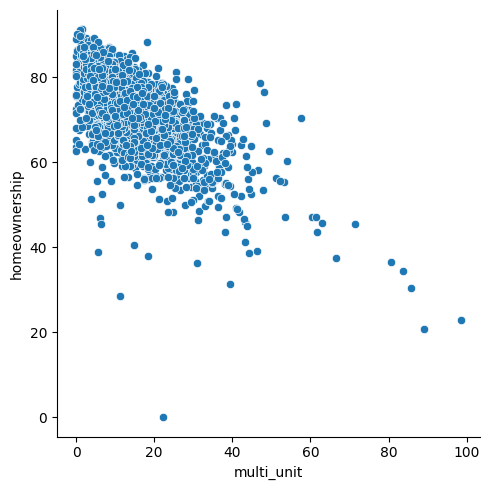

In [9]:
# relationship between homeownership and multi_unit
sns.relplot(
    data= county,
    x= 'multi_unit',
    y= 'homeownership'
);

The plot appears to show a discernable pattern: as homeownership decreases, the percent of multi-unit structures increases. These variables show some connection, and so are **associated** or **dependent** variables.

Since counties with more multi-unit structures are associated with lower homeownership, they are **negatively associated**. A **positive association** can be seen below between `pop_change` and `median_hh_income`.

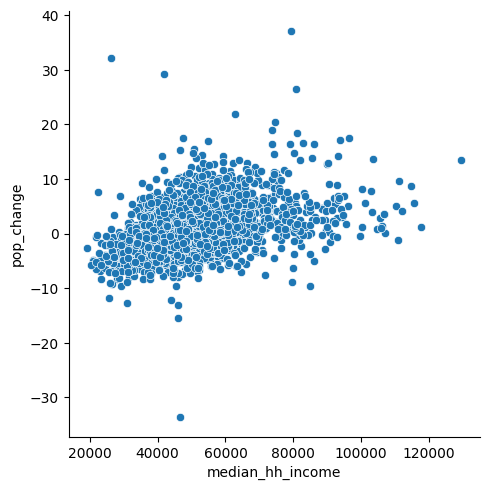

In [10]:
sns.relplot(
    data= county,
    x = 'median_hh_income',
    y = 'pop_change'
);

Variables with no association, or no evident relationship, are **independent**.

**Independence and association are mutually exclusive**. No pair of variables is both associated and independent.

Sometimes, variables are not just related - the change in one *causes* a change in another. The variable that causes the change is the **explanatory** or **independent** variable, and the one changed is the **response** or **dependent** variable. Labeling variables this way does not guarantee they exist. As they say, "correlation does not imply causation."

**Observational study**: when researchers collect data in a way that does not directly interfere with how the data arise. Observational studies can provide evidence of a naturally occurring association between variables, but they cannot, by themselves, show a causal connection. <br>
**Experiment**: when researchers collect data to investigate a causal connection. The researchers study two groups: the group that the researchers will affect or change is the **treatment** group, and the group that experiences no change is the **control** group. After the testing, the researchers can compare the two groups, and if there is a strong difference, a claim can be made that the treatment had an impact. The researchers try to remove any **bias** or **confounding variables** from the experiment so that a definitive causation is plausible.

Bias, and/or confounding variables, can take any number of forms - the most common is demographic info. One of the best ways to combat bias is to randomize who is placed into which group, making it a **randomized experiment**. This way, both groups have a variety of people in them, and the people within the groups are unlikely to share qualities that might explain the strong difference more than the treatment itself.

Another confounding variable is that the treatment group *knows that they are getting the treatment*. If a patient believes they're receiving a treatment that is going to make them feel better, that belief alone might make them feel better! To combat this, researchers often give a **placebo**, or fake treatment, to the control group.

## 1.2 Exercises

### 1.2.3

**(a)** The main research question of the study is: Is there a relationship between air pollutants and preterm births. <br>
**(b)** The subjects in the study are: 143,196 births between 1989 and 1993.<br>
**(c)** The variables in the study are: carbon monoxide (PPM) (continuous numerical), nitrogen dioxide (PP100M) (continuous numerical), ozone (PP100M) (continuous numerical), coarse particulate matter (ug/m^3) (continuous numerical), length of gestation (?) (continuous or discrete numerical), air pollution exposure specific to each record (?) (continuous or discrete numerical). Possibly, a variable similar to length of gestation, preterm birth (boolean).

### 1.2.4

**(a)** The main research question of the study is: Does the Buteyko method reduce asthma symptoms and improve quality of life? <br>
**(b)** The subjects in the study are: 600 asthma patients aged 18-69 who relied on medication for asthma treatment. <br>
**(c)** The variables in the study are: practiced buteyko method (boolean), quality of life (1-10, discrete numerical), activity (1-10, discrete numerical), asthma symptoms (1-10, discrete numerical), medication reduction (1-10, discrete numerical).

### 1.2.5

**(a)** The main research question in the study is: what is the relationship between honesty, age, and self control? <br>
**(b)** The subjects in the study are: 160 children between ages 5 and 15. <br>
**(c)** The variables in the study are: age (discrete numerical), sex (nominal categorical), only child (boolean), reported outcome (boolean), actual outcome (boolean), told explicitly not to cheat (boolean).

### 1.2.6

**(a)** The main research question in the study is: what is the relationship between socio-economic class and unethical behavior? <br>
**(b)** The subjects in the study are: 129 University of California undergraduates at Berkeley. <br>
**(c)** The variables in the study are: money (ordinal categorical), education (ordinal categorical), respected jobs (ordinal categorical), candies taken (discrete numerical)

### 1.2.7

**Explanatory**: received acupuncture specifically designed to treat migraines. <br>
**Response**: "Pain free" patient response after 24 hours.

### 1.2.8

**Explanatory**: received 10-day course of antibiotic. <br>
**Response**: "Improvement in symptoms" patient response (at end of 10 days).

### 1.2.9

**(a)** There are a total of 150 cases in the data set (50 from each species times 3 species). <br>
**(b)** The numerical variables in the study are: sepal length (continuous numerical), sepal width (continuous numerical), petal length (continuous numerical), petal width (continuous numerical). <br>
**(c)** The categorical variables in the study are: species (nominal categorical, levels: setosa, versicolor, virginica).

### 1.2.10

**(a)** Each row in the data matrix represents a UK resident. <br>
**(b)** There are a total of 1691 participants in the survey. <br>
**(c)** sex (nominal categorical), age (discrete numerical), marital (nominal categorical), grossIncome (ordinal categorical), smoke (boolean), amtWeekends (ordinal categorical), amtWeekdays (ordinal categorical).

### 1.2.11

**(a)** The variables used in creating the visualization are: latitude, longitude, privately vs publicly owned, private vs public use. <br>
**(b)** latitude (continuous numerical), longitude (continuous numerical), ownership (nominal categorical), use (nominal categorical)

### 1.2.12

**(a)** country, year, percent voted yes, issue.
**(b)** country (nominal categorical), year (discrete numerical), percent voted yes (continuous numerical), issue (nominal categorical)

## 1.3: Sampling Principles and Strategies

A **sample** is a subset of the cases in a target **population**. In studies, a sample is often a small fraction of the population because it is easier to collect a small, representative sample of a population than collect records of every case in the population.

Data collected in a haphazard fashion is **anecdotal evidence**. That evidence may be true or verifiable, but only represent extraordinary cases. If a man eats swordfish and gets mercury poisoning, this does not indicate that the average mercury content in swordfish is dangerously high. Anecdotal evidence is also typically composed of unusual cases that are remembered *because* they are so striking. 

**Simple random sample**: like a raffle ticket system, cases are chosen from the population entirely randomly.

One of the most common problems in simple random samples is **non-response bias** - if only a fraction of the people surveyed actually respond, it is unclear whether these responses are representative of the population. This problem is difficult, and often impossible, to solve.

Another common problem is a **convenience sample**, where individuals who are easily accessible are more likely to be included in the sample. People sampled from those walking around in Times Square is not representative of all people in New York City.

In the context of data, **observational data** is like an observational study - no treatment has been explicitly applied or withheld. Making causal conclusions based on observations is not recommended; it can only reasonably provide associations or help form hypotheses for later experiments.

As touched on previously, **confounding variables** have an impact on variable relationships between two variables and may explain more about the response variable than the explanatory variable. Sunscreen use and skin cancer have an association, but that does not account for the confounding variable of sun exposure - sunscreen users are more likely to be outside in the sun, and more sun exposure is more likely to cause skin cancer.

There are two types of observational study:

**Prospective study**: identifies individuals and collects information as events unfold. Prospective studies generally have more flexibility and customization for data collection, since individuals can be tested, questioned, etc. as the study progresses. <br>
**Retrospective study**: collects data after events have taken place. Retrospective studies do not have the breadth of data collection options available to researchers in prospective studies, but retrospective studies take less resources to accomplish. <br>

Maintain an awareness that data sets may contain information from both kinds of studies.

There are 4 main sampling methods:

- **Simple Random Sampling**: As discussed before, this type of sampling is the simplest - cases are selected into a sample from a population by pure random chance.
- **Stratified Sampling**: A population is divided into groups, or **strata**, so that similar cases are grouped together. Then simple random sampling is used *within each strata*.
- **Cluster Sampling**: A population is divided into groups, or **clusters**, so that similar cases are grouped together. Then simple random sampling is used *to select a fixed number of clusters*.
- **Multistage Sampling**: A combination of stratified and cluster sampling. The population is divided into groups, then random sampling is used to select from the groups, then random sampling is used *again* within each randomly selected group.

The upside of the fancier techniques like stratified or cluster sampling is that it is more economical (and often easier) to obtain valid data. The downside is that more advanced techniques are required to analyze it properly.

## 1.3 Exercises

### 1.3.13

**(a)** Population of interest: births in Southern California <br>
Sample in study: 143,196 births between years 1989 and 1993 <br>
**(b)** If the births were randomly sampled, then the results could be generalized to the population. It is unlikely that the year would be a confounding variable. However, a causal relationship cannot be established, only an association, since this is an observational retrospective study.

### 1.3.14

**(a)** The population of interest is not clearly defined, although the characteristics of the cases would suggest that the population is children between the ages of 5 and 15. The sample is 160 children between ages 5 and 15. <br>
**(b)** The results of the study can be generalized to the population as long as the children were randomly sampled. The more characteristics the children share, the smaller the scope of the population becomes. The study can be used to establish causal relationships, since this is a prospective experimental study, though the researchers should clearly define a single variable to test for each hypothesis, even if they use the same data across hypotheses.

### 1.3.15

**(a)** The population of interest is asthma patients aged 18-69 who rely on medication for asthma treatment. <br>
**(b)** The results of this study can be generalized to the population, since they were randomly assigned into control and treatment groups, and the study can be used to establish causal relationships, since this is an experimental study.

### 1.3.16

**(a)** The population of interest is not clearly defined, although the characteristics of the cases would suggest that the population is University of California Berkeley undergraduates. The study is probably attempting to use their sample to make inferences about other populations, though it does not address confounding variables for other populations. <br>
The sample is 129 University of California Berkeley undergraduates. <br>
**(b)** The results of the study can be generalized to the UCB undergrads, though making inferences about populations beyond this may be treacherous since confounding variables might exist, such as such as age (undergraduates are generally 18-21, and perhaps as people age, they are more or less ethical), location (perhaps Californians act more or less ethically than others), or economic circumstance (those attending college generally come from moderately affluent families). <br>
The study can be used to establish causal relationships, since this is an experimental study.

### 1.3.17

**(a)** observation <br>
**(b)** variable <br>
**(c)** sample statistic <br>
**(d)** population parameter

### 1.3.18

**(a)** population parameter <br>
**(b)** sample statistic <br>
**(c)** observation <br>
**(d)** variable

### 1.3.19

**(a)** Prospective observational study <br>
**(b)** Stratified sampling is likely the best strategy for this study. The strata are the 4 groups of different lab sections with 40 students each, then randomly survey 10-15 students from each class.

### 1.3.20

**(a)** Prospective observational study <br>
**(b)** Stratified sampling is likely the best strategy for this study. The strata are the groups living on either side of campus (freshmen/sophomores, juniors/seniors), then randomly survey an equal number of students from each strata. Ideally, there would be 4 strata (one for each year) but it is more economical and practical to sample randomly from only the two groups.

### 1.3.21

**(a)** There appears to be a logarithmic (positive) relationship between life expectancy and percentage of internet users. <br>
**(b)** Retrospective observational study <br>
**(c)** Countries with a higher percentage of internet users also might have access to better quality of life overall, including better shelter, food, electricity, healthcare, etc. Quality of life variables (unsurprisingly) have a profound impact on life expectancy.

### 1.3.22

**(a)** Prospective observational study <br>
**(b)** No causal relationship can be concluded, only an association, since this is an observational study. <br>
**(c)** Drinking coffee and sleeping less may be confounding variables, since coffee (caffeine) dehydrates the body, leading to muscle cramps, and sleeping less has a myriad of negative health effects which may include muscle cramps.

### 1.3.23

**(a)** The method is reasonable. It is likely to be representative of the undergraduate student body. <br>
**(b)** This method is reasonable, but unnecessary. Field of study is unlikely to have a significant impact on how students react to improving the student union. <br>
**(c)** This method is unreasonable. Because age generally determines year in school (freshmen, etc.), the method would be blind to entire sections of the student body, and therefore, unrepresentative.

# Chapter 2: Summarizing Data

# Chapter 3: Probability

# Chapter 4: Distributions of Random Variables

In [11]:
# probability of finding first success in 
# Nth trial if
# P is probability of success and
# 1-P is probability of failure
def geometric_distribution(p:float, n:int):
    from math import sqrt

    probability = p * (1-p)**(n-1)
    mean = 1 / p
    variance = (1-p)/(p**2)
    std = math.sqrt(variance)

    return probability, mean, variance, std

In [12]:
# GP 4.23
print(round(1/0.7, 2))

1.43


In [13]:
prob = 0.7
p_list = []
for i in range(1, 4):
    p, mu, sigma, std = geometric_distribution(prob, i)
    p_list.append(p)
print(sum(p_list))
p_complement = (1-prob)**3
print(1-p_complement)

0.973
0.973


In [14]:
# 4.11a
prob = 0.25
mu = 1 / prob
std = math.sqrt((1-prob)/(prob**2))
print(prob, mu, std)

0.25 4.0 3.4641016151377544


In [15]:
#4.11b
prob = 1/6
mu = 1 / prob
std = math.sqrt((1-prob)/(prob**2))
print(prob, mu, std)

0.16666666666666666 6.0 5.477225575051661


In [16]:
#4.12a
with_replacement = (5/10)**2
without_replacement = (5/10) * (4/9)

print(with_replacement)
print(without_replacement)

0.25
0.2222222222222222


In [17]:
#4.12b
with_replacement = (5000/10000)**2
without_replacement = (5000/10000) * (4999/9999)

print(with_replacement)
print(without_replacement)

0.25
0.24997499749974997


In [18]:
#4.13a
blue_eyes = 0.125
brown_eyes = 0.75
green_eyes = 0.125

n_children = 3

prob = (1-blue_eyes)**(n_children-1) * blue_eyes
print(prob)

0.095703125


In [19]:
#4.13b
mu = 1 / blue_eyes
std = math.sqrt((1-blue_eyes)/(blue_eyes**2))
print(mu, std)

8.0 7.483314773547883


In [20]:
#4.14a
defect = 0.02
n_failure = 10

prob = (1-defect)**(n_failure-1) * defect
print(prob)

0.016674955242602995


In [21]:
#4.14b
prob = (1-defect)**100
print(prob)

0.13261955589475294


In [22]:
#4.14c
mu = 1 / defect
std = math.sqrt((1-defect)/(defect**2))
print(mu, std)

50.0 49.49747468305833


In [23]:
# 4.14d
defect = 0.05
mu = 1 / defect
std = math.sqrt((1-defect)/(defect**2))
print(mu, std)

20.0 19.493588689617926


In [24]:
# probability of finding k successes in n trials
def binomial_distribution(p:float, n:int, k:int):
    prob = math.comb(n, k) * (p**k) * ((1-p)**(n-k))
    mu = n * p
    var = n * p * (1-p)
    std = math.sqrt(var)

    return prob, mu, var, std

In [25]:
p = 0.7
n = 8
k = 5

results = [binomial_distribution(p, n, k)]

print(results[0])

(0.25412184000000004, 5.6, 1.6800000000000002, 1.2961481396815722)
